<a href="https://colab.research.google.com/github/CodexJoe/MechineLearning-/blob/main/RandomForest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://github.com/scikit-learn/scikit-learn/tree/main/sklearn
from google.colab import files
upload = files.upload()

Saving iris.csv to iris.csv


In [3]:
import pandas as pd
data = pd.read_csv('iris.csv')

In [21]:
data.head()

,index,sepal.length,sepal.width,petal.length,petal.width,variety
0,0,5.1,3.5,1.4,0.2,Setosa
1,1,4.9,3.0,1.4,0.2,Setosa
2,2,4.7,3.2,1.3,0.2,Setosa
3,3,4.6,3.1,1.5,0.2,Setosa
4,4,5.0,3.6,1.4,0.2,Setosa


In [5]:
data.duplicated().sum()

1

In [8]:
data = data.drop_duplicates()

In [9]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data[['sepal.length','sepal.width', 'petal.length', 'petal.width']]))
outlier = list(set(np.where(z > 3)[0]))
len(outlier)

1

In [10]:
outlier

[15]

In [11]:
data.loc[15]

sepal.length       5.7
sepal.width        4.4
petal.length       1.5
petal.width        0.4
variety         Setosa
Name: 15, dtype: object

In [12]:
data = data.drop(outlier, axis = 0).reset_index(drop = False)

In [13]:
len(data)

148

In [14]:
z = np.abs(stats.zscore(data[['sepal.length','sepal.width', 'petal.length', 'petal.width']]))
outlier = list(set(np.where(z > 3)[0]))
len(outlier)

0

In [23]:
x = data[['sepal.length','sepal.width', 'petal.length', 'petal.width']].values # select everthing both last column
y = data.iloc[:, 5].values

x.shape

(148, 4)

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [27]:
#At last, we need to make prediction. It can be done with the help of following script −

y_pred = classifier.predict(x_test)
print(y_pred)

['Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Virginica'
 'Virginica' 'Setosa' 'Virginica' 'Setosa' 'Setosa' 'Setosa' 'Versicolor'
 'Virginica' 'Versicolor' 'Versicolor' 'Virginica' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor' 'Setosa'
 'Versicolor' 'Setosa' 'Virginica' 'Virginica' 'Versicolor' 'Setosa'
 'Virginica' 'Setosa' 'Setosa' 'Virginica' 'Virginica' 'Versicolor'
 'Versicolor' 'Setosa' 'Setosa' 'Virginica' 'Setosa' 'Versicolor'
 'Virginica' 'Virginica' 'Virginica' 'Versicolor']


In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[13  0  0]
 [ 0 18  1]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      0.95      0.97        19
   Virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Accuracy: 0.9777777777777777


Predicted   Setosa  Versicolor  Virginica
Actual                                   
Setosa          13           0          0
Versicolor       0          18          1
Virginica        0           0         13


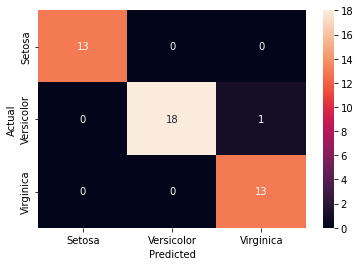

In [30]:
import seaborn as sns
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print(confusion_matrix)

In [34]:
#Using decision Tree
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_decision_pred = model.predict(x_test)

Predicted   Setosa  Versicolor  Virginica
Actual                                   
Setosa          13           0          0
Versicolor       0          18          1
Virginica        0           0         13


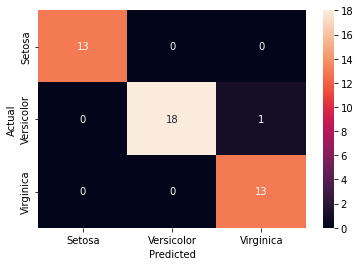

In [35]:
import seaborn as sns
confusion_matrix = pd.crosstab(y_test, y_decision_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print(confusion_matrix)

[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.665\nsamples = 103\nvalue = [36, 31, 36]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.497\nsamples = 67\nvalue = [0, 31, 36]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.9\ngini = 0.208\nsamples = 34\nvalue = [0, 30, 4]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[0] <= 4.95\ngini = 0.067\nsamples = 29\nvalue = [0, 28, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini =

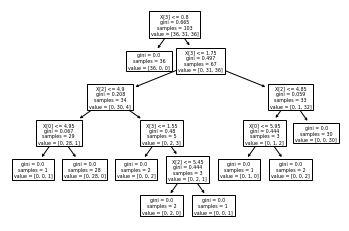

In [36]:
tree.plot_tree(model)

In [45]:
#Using Cross Validation
from sklearn import datasets
from sklearn.model_selection import cross_val_score
data = datasets.load_iris()
cls = RandomForestClassifier(n_estimators= 100)
score = cross_val_score(cls, data.data, data.target, cv =3)
print(score)
print(sum(score)/3)

[0.98 0.94 0.94]
0.9533333333333333


In [65]:
#K-Fold
from sklearn.model_selection import KFold
cv = KFold(n_splits = 10, random_state= 100, shuffle = True)
scores = cross_val_score(cls, data.data, data.target, cv = cv)
print(scores)
print(sum(scores/10))
cv.get_n_splits() # Gives the number of splits

[1.         0.93333333 0.93333333 1.         0.86666667 0.86666667
 0.93333333 1.         1.         0.93333333]
0.9466666666666668


10